In [20]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\mltill mid\New folder\USA_Housing.csv')

In [5]:
df.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4194,76076.10630,5.771704,7.831932,3.30,45327.57551,1.567859e+06
169,62784.33295,7.572350,4.652718,3.31,35122.38947,1.007479e+06
3641,84690.16728,5.887704,6.705514,3.17,34859.25425,1.431387e+06
473,55612.76294,7.691465,7.186178,4.22,42258.53738,1.355022e+06
2457,55507.31253,7.146273,8.061203,6.22,44669.45555,1.318231e+06
1791,62745.03284,6.417465,8.158035,4.19,16737.55224,8.974800e+05
3226,70975.97110,6.791320,8.999013,3.15,61104.36278,2.100698e+06
302,54866.21569,6.986763,7.285434,3.46,35192.84403,9.294806e+05
305,69878.77420,7.218331,6.249192,4.02,26814.17475,1.197515e+06
4247,80980.26057,5.428227,6.678788,3.38,37340.98294,1.416648e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [8]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

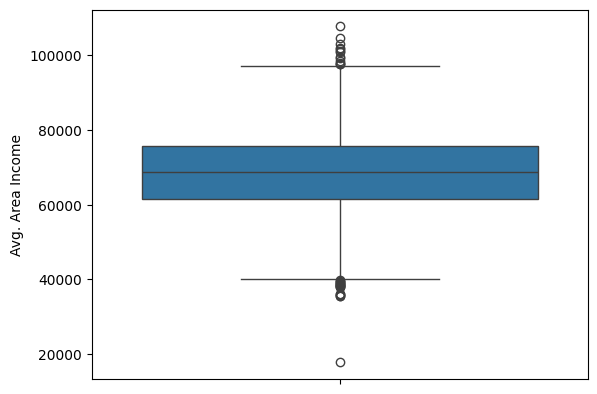

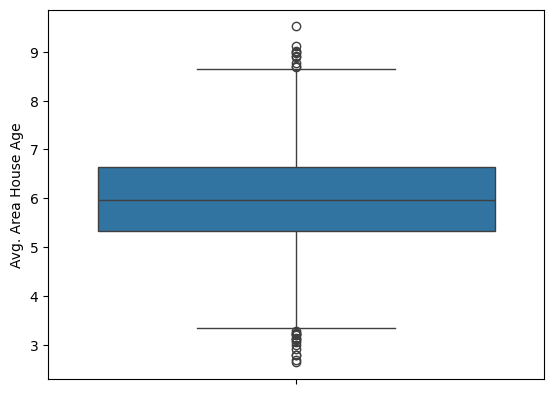

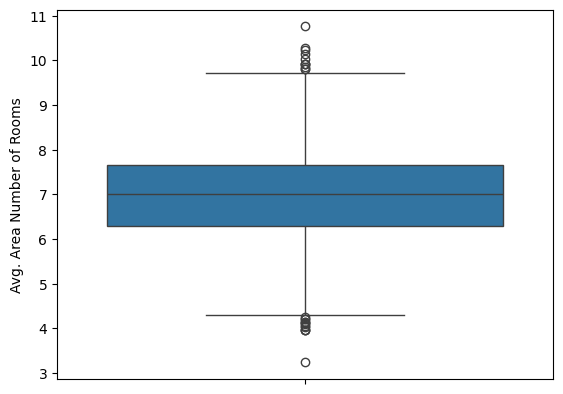

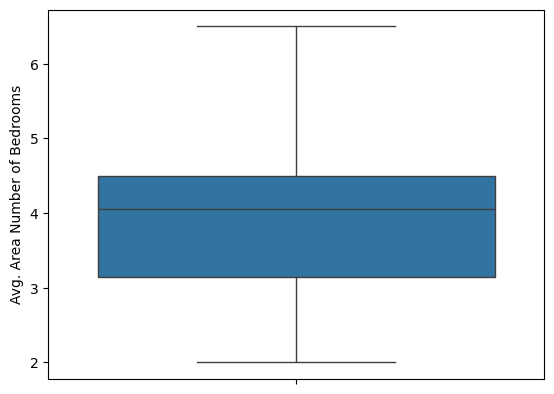

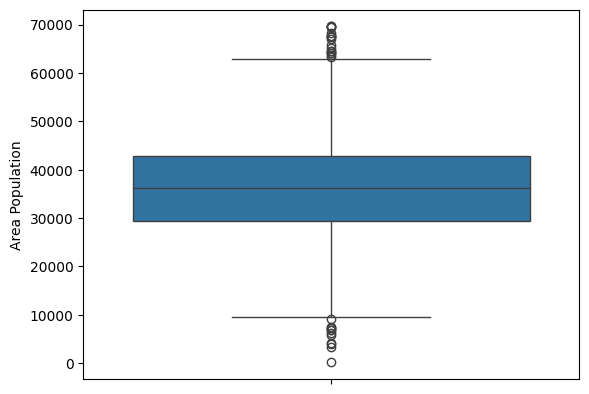

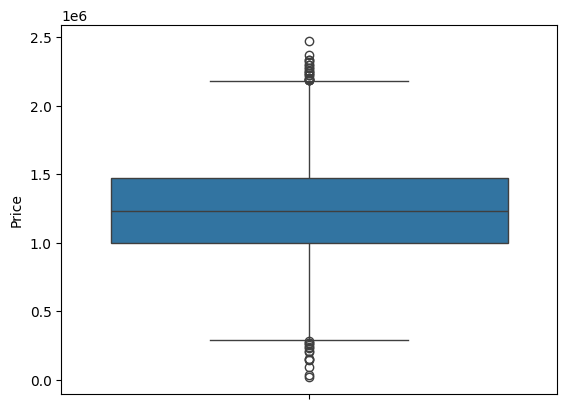

In [11]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()


In [13]:
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[col]>=lower) & (df[col]<=upper)]

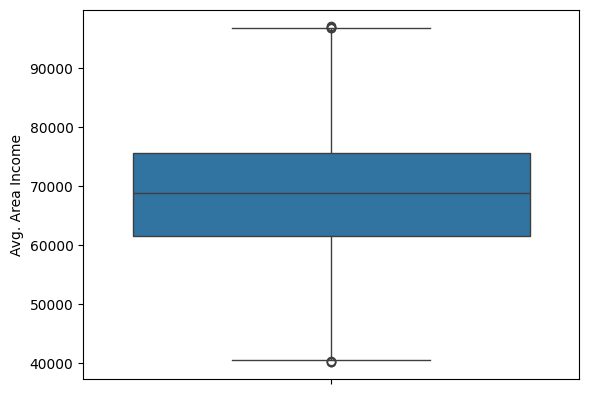

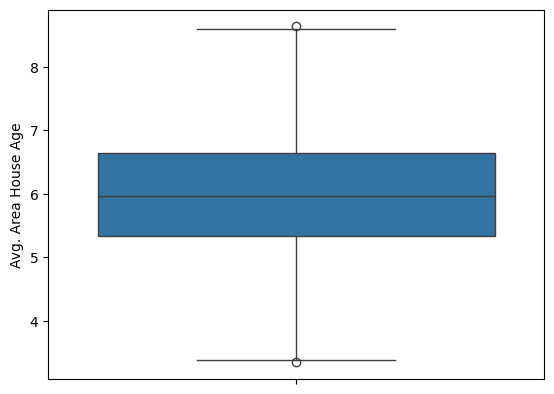

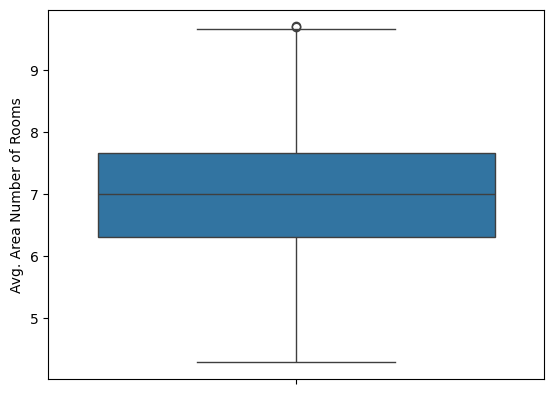

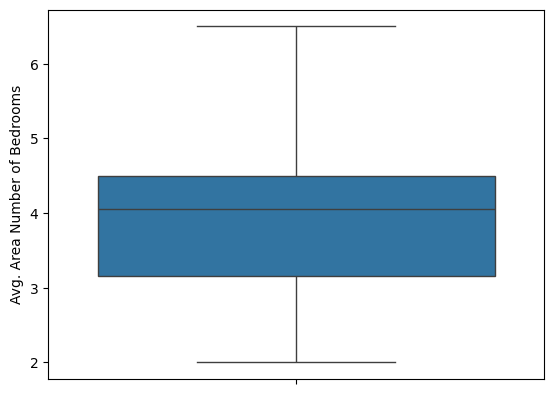

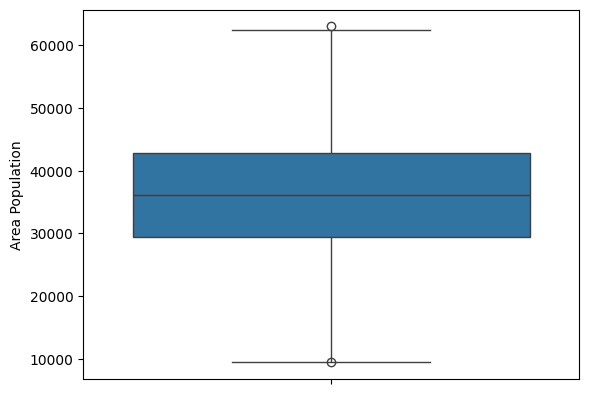

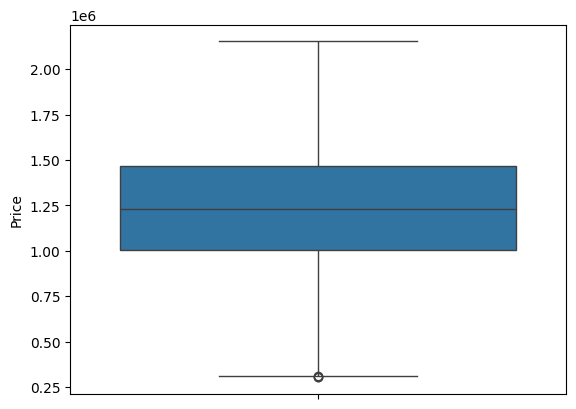

In [14]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [16]:
df2=df.copy()
df2.duplicated().sum()

np.int64(0)

In [17]:
df2.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1584,83637.53309,6.430984,6.257289,2.13,25962.77118,1.396401e+06
1594,68355.44217,7.007745,6.610357,4.29,38950.15522,1.352757e+06
1752,73462.68344,6.622909,5.829704,3.04,47637.51525,1.638577e+06
2117,66571.38612,4.897455,9.027656,5.20,26651.84551,1.238486e+06
526,66112.53645,8.236623,7.009803,6.31,20795.15006,1.376715e+06
2991,81248.19697,7.939004,6.749489,4.25,48922.52140,1.969257e+06
46,73946.85107,4.863154,7.537182,6.35,35261.12702,1.109588e+06
338,85707.07875,4.374148,6.350157,4.47,10424.41625,9.660844e+05
836,69689.62970,4.065513,6.311315,4.46,27438.68941,8.436332e+05
1519,55840.16560,4.950203,7.650712,3.04,30795.10799,7.812131e+05


In [21]:
from sklearn.preprocessing import MinMaxScaler

array=df2.values

x=array[:,0:5]
y=array[:,5]
scaler=MinMaxScaler(feature_range=(0,1))
rescaled=scaler.fit_transform(x)
np.set_printoptions(precision=3)
rescaled[0:5,:]

array([[0.692, 0.442, 0.502, 0.464, 0.254],
       [0.686, 0.502, 0.45 , 0.242, 0.574],
       [0.371, 0.476, 0.779, 0.696, 0.512],
       [0.407, 0.726, 0.239, 0.28 , 0.464],
       [0.348, 0.32 , 0.655, 0.496, 0.315]])

In [23]:
df2.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3570,50337.06750,4.853508,6.241565,4.22,32299.06465,3.909485e+05
2426,56962.44831,6.348595,6.055685,3.16,43181.51307,1.127082e+06
285,82145.36942,6.540968,6.876150,4.23,25736.09605,1.340067e+06
4257,78933.49592,6.844164,7.416307,3.15,28675.19043,1.520371e+06
4015,73273.33404,6.291080,6.497473,4.18,36790.91474,1.132984e+06
1986,51797.30318,4.692821,7.373720,4.14,30640.17617,4.910858e+05
3248,58272.92972,4.479702,7.924178,3.39,39755.90317,8.238218e+05
1617,62594.97909,5.493366,7.962688,3.35,46459.25100,1.427027e+06
1421,81026.60678,6.278111,8.133308,4.29,24407.24318,1.349990e+06
184,82906.65480,5.901452,5.767366,4.26,38820.48194,1.454943e+06


In [24]:
df2.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [25]:
x=df2[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].values

In [26]:
y=df2['Price'].values

In [27]:
x.shape

(4856, 5)

In [28]:
y.shape

(4856,)

In [29]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [30]:
xtest

array([[6.981e+04, 7.424e+00, 7.258e+00, 3.380e+00, 5.145e+04],
       [7.861e+04, 7.306e+00, 7.092e+00, 6.490e+00, 1.849e+04],
       [7.013e+04, 8.195e+00, 9.570e+00, 4.070e+00, 2.679e+04],
       ...,
       [5.080e+04, 6.799e+00, 6.911e+00, 4.180e+00, 2.373e+04],
       [6.213e+04, 6.598e+00, 7.969e+00, 6.450e+00, 3.789e+04],
       [6.185e+04, 7.216e+00, 7.673e+00, 3.500e+00, 2.381e+04]])

In [31]:
ytest

array([1789607.526, 1536208.366, 1675557.271,  866689.091, 1504664.281,
       1185743.824,  803259.613, 1495518.624,  994257.535,  971099.475,
        918533.616, 1541746.291, 1540737.193, 1390990.849, 1783534.839,
       1788786.456, 1176655.085, 1432902.753, 1281378.174, 1343394.634,
       1085113.451, 1819900.637, 1040652.839, 1244881.363, 1236044.316,
       1536234.709, 1196643.385, 1358526.741, 1594089.241, 1752112.604,
        990893.16 ,  849153.123,  668183.51 ,  407718.938,  939139.029,
       1416408.25 ,  972670.813,  562839.469, 1325294.121, 1313304.588,
       1613414.233, 1056518.913,  903657.562, 1307173.872, 1126450.426,
       1812209.137, 1405933.019, 1375105.346,  987004.084, 1232992.841,
        986285.382,  860399.345, 1678347.528, 1025908.914, 1170705.166,
       1906024.636, 1262104.926,  882057.171, 1085218.859, 1144137.636,
        942508.962, 1530068.012, 1134125.646, 1048302.409, 1066659.383,
       1096912.036, 1517316.574, 1409439.064, 1244955.461,  8663

In [32]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(xtrain,ytrain)

LinearRegression()

In [33]:
ypred=model.predict(xtest)
ypred

array([1760373.824, 1418230.574, 1799859.814,  838948.922, 1490329.212,
       1358106.864,  789088.3  , 1216363.355, 1013338.209,  911309.547,
        983487.295, 1458687.391, 1585569.32 , 1428867.604, 1803971.722,
       1651996.556, 1089327.095, 1528624.425, 1281028.906, 1317377.816,
       1057490.699, 1880231.486,  970298.355, 1443741.408, 1290441.732,
       1424966.437, 1089442.867, 1287353.729, 1523732.871, 1834694.957,
        955127.675,  917307.383,  512722.393,  513461.283, 1035358.126,
       1458440.352, 1097878.282,  631114.049, 1239221.326, 1220849.886,
       1583550.788,  990432.363,  890132.144, 1130282.124, 1112587.418,
       1833744.027, 1410458.433, 1301294.9  ,  949959.257, 1409465.772,
       1036983.08 , 1080451.841, 1818360.651,  898854.825, 1182035.158,
       1909967.705, 1187805.479,  795372.346, 1252454.61 , 1146273.594,
       1033941.187, 1563639.863,  954710.625, 1118590.786, 1182656.708,
       1144105.386, 1389674.285, 1499458.608, 1280508.423,  9950

In [34]:
ytest

array([1789607.526, 1536208.366, 1675557.271,  866689.091, 1504664.281,
       1185743.824,  803259.613, 1495518.624,  994257.535,  971099.475,
        918533.616, 1541746.291, 1540737.193, 1390990.849, 1783534.839,
       1788786.456, 1176655.085, 1432902.753, 1281378.174, 1343394.634,
       1085113.451, 1819900.637, 1040652.839, 1244881.363, 1236044.316,
       1536234.709, 1196643.385, 1358526.741, 1594089.241, 1752112.604,
        990893.16 ,  849153.123,  668183.51 ,  407718.938,  939139.029,
       1416408.25 ,  972670.813,  562839.469, 1325294.121, 1313304.588,
       1613414.233, 1056518.913,  903657.562, 1307173.872, 1126450.426,
       1812209.137, 1405933.019, 1375105.346,  987004.084, 1232992.841,
        986285.382,  860399.345, 1678347.528, 1025908.914, 1170705.166,
       1906024.636, 1262104.926,  882057.171, 1085218.859, 1144137.636,
        942508.962, 1530068.012, 1134125.646, 1048302.409, 1066659.383,
       1096912.036, 1517316.574, 1409439.064, 1244955.461,  8663

In [35]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ypred)
r2

0.9135403871576828